<a href="https://colab.research.google.com/github/jiiiisoo/deeplearning_yonsei/blob/main/Covid-19%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing training set
dataset_train = pd.read_csv('/content/drive/MyDrive/deeplearning/HW6/case.csv')

print(dataset_train.shape)
dataset_train.head()

(680, 2)


,2020-01-20,1
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,0


In [ ]:
#2020-01-20 행 아래로 내려줌
dataset_train.loc[-1]=['2020-01-20',1] #adding row
dataset_train.index+=1 #shifting index
dataset_train=dataset_train.sort_index() #sorting by index
print(dataset_train.shape)
dataset_train.head()

(681, 2)


,2020-01-20,1
0,2020-01-20,1
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,1


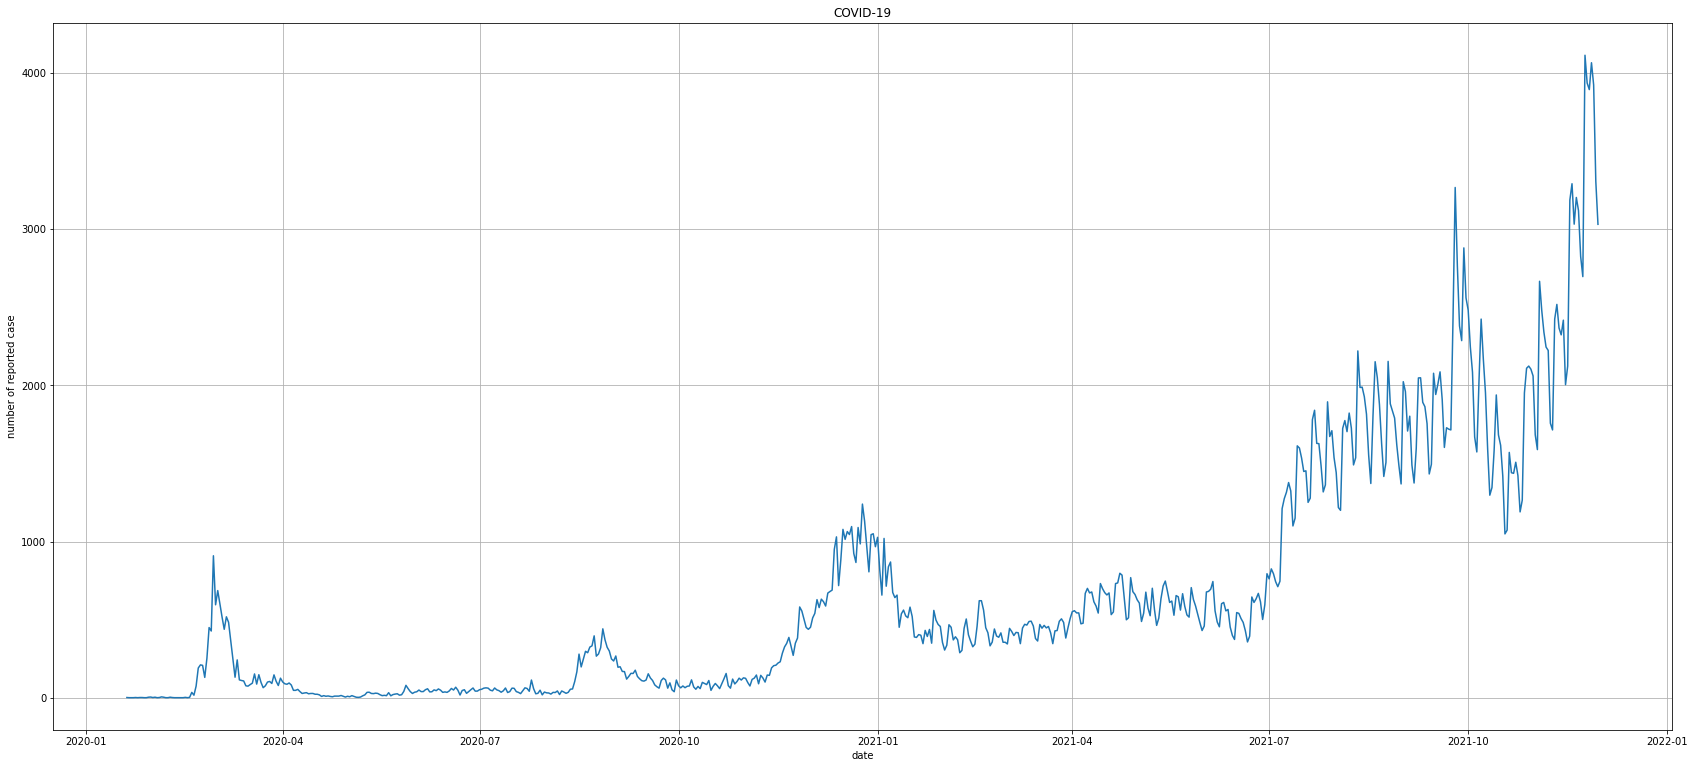

In [ ]:
# 1 (a)
#time series dataset
y=dataset_train.iloc[:,1]
x=pd.date_range('2020-01-20','2021-11-30')
plt.figure(figsize=(29,13))
plt.title('COVID-19')
plt.xlabel('date')
plt.ylabel('number of reported case')
plt.grid()
plt.plot(x,y)

In [ ]:
#Dividing train, test dataset
#시간 순서대로 나열되어있으므로 두번째 열만 추출
train_set=dataset_train.iloc[0:580,1:2].values
test_set=dataset_train.iloc[580:,1:2].values
print(train_set.shape, test_set.shape)

(580, 1) (101, 1)


In [ ]:
# 1. (b),(c),(d)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train_set)

In [ ]:
#Creating a data structure with 15, 30, 60 timesteps and output
# 15, 30, 60마다 숫자 바꾸며 할당
X_train=[]
y_train=[]
for j in range(60,580):
  X_train.append(train_set_scaled[j-60:j,0])
  y_train.append(train_set_scaled[j,0])
X_train,y_train=np.array(X_train), np.array(y_train)
#Reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape, y_train.shape

((520, 60, 1), (520,))

In [ ]:
#Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#Initialising RNN
regressor=Sequential()

#Adding first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# classification 아니므로 loss MSE 사용
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
fit=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17/17 [==============================] - 6s 19ms/step - loss: 0.0270 - accuracy: 0.0019
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0090 - accuracy: 0.0019
Epoch 3/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0071 - accuracy: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0069 - accuracy: 0.0019
Epoch 5/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0080 - accuracy: 0.0019
Epoch 6/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0060 - accuracy: 0.0019
Epoch 7/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 0.0019
Epoch 8/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.0019
Epoch 9/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0053 - accuracy: 0.0019
Epoch 10/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0053 - accuracy: 0.0019

In [ ]:
#loss, accuracy
loss_15=fit.history['loss']
accuracy_15=fit.history['accuracy']

In [ ]:
loss_30=fit.history['loss']
accuracy_30=fit.history['accuracy']

In [ ]:
loss_60=fit.history['loss']
accuracy_60=fit.history['accuracy']

In [ ]:
#Getting predicted data (for 15,30,60)
inputs=dataset_train.iloc[dataset_train.shape[0]-test_set.shape[0]-60:,1:2].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for j in range(60,inputs.shape[0]):
  X_test.append(inputs[j-60:j,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_data = regressor.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data)
X_test.shape

(101, 60, 1)

In [ ]:
#saving predicted data
predicted_15=predicted_data

In [ ]:
predicted_30=predicted_data

In [ ]:
predicted_60=predicted_data

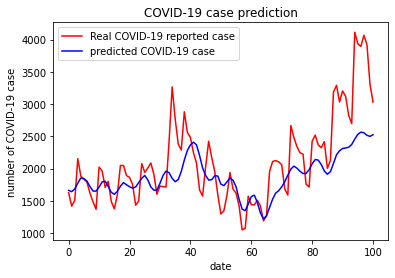

In [ ]:
#Visualising results
#for 15
plt.plot(test_set,color='red', label= 'Real COVID-19 reported case')
plt.plot(predicted_data, color='blue', label='predicted COVID-19 case')
plt.title('COVID-19 case prediction')
plt.xlabel('date')
plt.ylabel('number of COVID-19 case')
plt.legend()
plt.show()

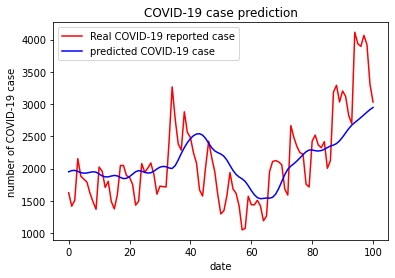

In [ ]:
#for 30
plt.plot(test_set,color='red', label= 'Real COVID-19 reported case')
plt.plot(predicted_data, color='blue', label='predicted COVID-19 case')
plt.title('COVID-19 case prediction')
plt.xlabel('date')
plt.ylabel('number of COVID-19 case')
plt.legend()
plt.show()

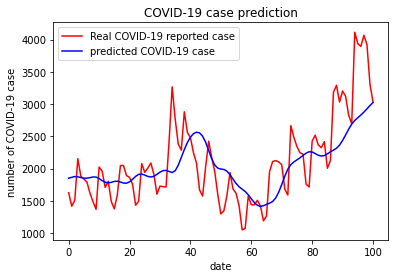

In [ ]:
#for 60
plt.plot(test_set,color='red', label= 'Real COVID-19 reported case')
plt.plot(predicted_data, color='blue', label='predicted COVID-19 case')
plt.title('COVID-19 case prediction')
plt.xlabel('date')
plt.ylabel('number of COVID-19 case')
plt.legend()
plt.show()

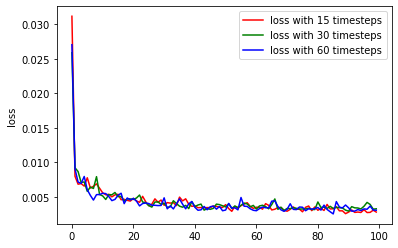

In [ ]:
#loss
plt.plot(loss_15, color='red', label='loss with 15 timesteps')
plt.plot(loss_30, color='green', label='loss with 30 timesteps')
plt.plot(loss_60, color='blue', label='loss with 60 timesteps')
plt.ylabel('loss')
plt.legend()
plt.show()

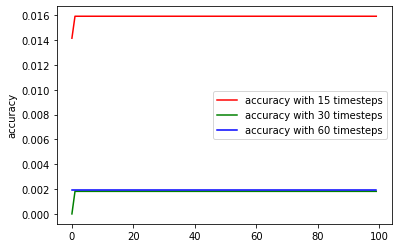

In [ ]:
#accuracy
plt.plot(accuracy_15, color='red', label='accuracy with 15 timesteps')
plt.plot(accuracy_30, color='green', label='accuracy with 30 timesteps')
plt.plot(accuracy_60, color='blue', label='accuracy with 60 timesteps')
plt.ylabel('accuracy')
plt.legend()
plt.show()

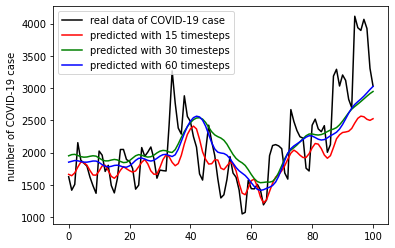

In [ ]:
#predicted data for 15, 30, 60
plt.plot(test_set, color='black', label='real data of COVID-19 case')
plt.plot(predicted_15, color='red', label='predicted with 15 timesteps')
plt.plot(predicted_30, color='green', label='predicted with 30 timesteps')
plt.plot(predicted_60, color='blue', label='predicted with 60 timesteps')
plt.ylabel('number of COVID-19 case')
plt.legend()
plt.show()